In [48]:
from typing import TypedDict

class ProjectConfig(TypedDict):
    amount_usd: float
    total_usd: float    
    total_inr: float    
    total_eur: float    
    

In [49]:
# myobj: ProjectConfig = {    
#     'amount_usd': 1000.0,
#     'total_usd': 1000,    
#     'total_inr': 2000,  # This should be a float, but is intentionally incorrect for demonstration
#     'total_eur': 900,}

In [50]:
def calc_total(state: ProjectConfig) -> ProjectConfig:
    """
    Calculate the total returns amount in USD.
    """
    state['total_usd'] = state['amount_usd'] * 1.08
    return state    

def convert_to_inr(state: ProjectConfig) -> ProjectConfig:
    """
    Calculate the total returns amount in INR.
    """
    state['total_inr'] = state['total_usd'] * 82.0
    return state    

def convert_to_eur(state: ProjectConfig) -> ProjectConfig:
    """
    Calculate the total returns amount in EUR.
    """
    state['total_eru'] = state['total_usd'] * 0.92
    return state    

In [51]:
from langgraph.graph import StateGraph,START,END

bulider= StateGraph(ProjectConfig)

bulider.add_node("calc_total", calc_total)
bulider.add_node("convert_to_inr", convert_to_inr)
bulider.add_node("convert_to_eur", convert_to_eur)

bulider.add_edge(START, "calc_total")
bulider.add_edge("calc_total", "convert_to_inr")
# bulider.add_edge("calc_total", "convert_to_eur")
bulider.add_edge("convert_to_inr", END)


graph = bulider.compile()




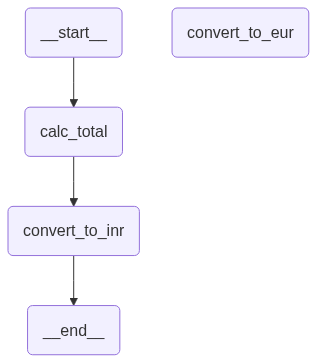

In [52]:
from IPython.display import display, Image

# assuming draw_mermaid_png() returns image bytes
display(Image(data=graph.get_graph().draw_mermaid_png()))


In [53]:
graph.invoke({'amount_usd': 1000.0,})

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_inr': 88560.0}